<a href="https://colab.research.google.com/github/mayday112/Fooocus/blob/main/Klasifikasi_dengan_Algoritma_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Teori: Klasifikasi dengan Supervised Learning
##Apa itu Klasifikasi?
* Klasifikasi adalah salah satu tugas dalam supervised learning, di mana model mempelajari pola dari data yang diberi label untuk memprediksi kelas dari data baru.
* Contoh klasik adalah memprediksi apakah cuaca "cerah", "berawan", atau "hujan" berdasarkan data historis seperti suhu, kelembapan, dll.

## Supervised Learning
* Supervised learning adalah jenis pembelajaran mesin di mana model dilatih pada data yang sudah diberi label. Data ini terdiri dari:
  * Fitur (X): Variabel input (misalnya, suhu, kelembapan).
  * Label (y): Output atau target (misalnya, kondisi cuaca: cerah, hujan, dsb.).

## Langkah-Langkah Klasifikasi
* Memahami Dataset: Memahami data yang tersedia.
* Preprocessing: Menyiapkan data, termasuk menangani data yang hilang, encoding variabel kategoris, dan normalisasi.
* Modeling: Memilih algoritma klasifikasi seperti Random Forest, Decision Tree, dll.
* Evaluasi: Menggunakan metrik evaluasi seperti akurasi, precision, recall, dan confusion matrix.

## Persiapan Kode di Google Colab
Untuk memulai di Google Colab, pertama Anda perlu mengimpor dataset dan melakukan preprocessing. Langkah-langkah yang akan kita lakukan adalah:

* Memuat Dataset: Mengimpor dataset menggunakan pandas.
* Eksplorasi Data: Melihat statistik dasar dan kolom dataset.
* Preprocessing: Menangani nilai yang hilang, encoding untuk data kategorikal, dan normalisasi fitur.
* Modeling: Menggunakan regresi linear atau algoritma lain untuk membuat model prediksi harga.
* Evaluasi Model: Menggunakan metrik regresi seperti MSE (Mean Squared Error) untuk mengevaluasi kinerja model.

##1. Impor Library
Kita memerlukan beberapa library untuk manipulasi data, preprocessing, pelatihan model, dan evaluasi.

In [1]:
# Mengimpor library yang dibutuhkan
import pandas as pd #Menampilkan Data berbentuk DataFrame
import numpy as np # Menghitung perhitungan angka
from sklearn.model_selection import train_test_split # membagi dataset, misalnya 80%, 20%
from sklearn.ensemble import RandomForestRegressor  # Menggunakan Regressor untuk regresi
from sklearn.preprocessing import LabelEncoder, StandardScaler #Pelabelan DataTransform
from sklearn.metrics import mean_squared_error, r2_score # Evaluasi Pemodelan ML
import matplotlib.pyplot as plt # Menggambarkan Grafik/Chart

## 2. Mengakses dan Memuat Dataset
Dataset "laptop_price.csv" berisi informasi tentang laptop, termasuk fitur-fitur seperti:
* Brand: Merek laptop
* Laptop_Type: Jenis laptop (Gaming, Business, dll)
* RAM: Kapasitas RAM
* Processor: Jenis prosesor
* Storage: Tipe dan kapasitas penyimpanan
* Price: Harga laptop (target variabel)

Tujuan dari tugas ini adalah untuk memprediksi harga laptop berdasarkan fitur-fitur tersebut. Dalam hal ini, kita akan melakukan regresi karena harga adalah nilai kontinu yang ingin kita prediksi.

Link : https://raw.githubusercontent.com/chandanverma07/DataSets/master/laptop_price.csv

In [2]:
# Mengimpor dataset
url = 'https://raw.githubusercontent.com/chandanverma07/DataSets/master/laptop_price.csv'
data = pd.read_csv(url, encoding='ISO-8859-1')  # Encoding untuk menghindari UnicodeDecodeError

# Menampilkan beberapa baris pertama dataset
print("Dataset Preview:")
data.head()

Dataset Preview:


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Eksplorasi Data
Penjelasan: Mengecek kolom dataset, tipe data, dan data yang hilang.

In [3]:
# Menampilkan informasi umum tentang dataset
print("Informasi Dataset:")
data.info()

# Mengecek jumlah nilai yang hilang di setiap kolom
print("\nJumlah Nilai Hilang:")
print(data.isnull().sum())

# Menampilkan statistik deskriptif
print("\nStatistik Dataset:")
data.describe()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB

Jumlah Nilai Hilang:
laptop_ID           0
Company             0
Product             0
TypeName        

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


## Preprocessing Data
Penjelasan: Membersihkan data, mengisi nilai yang hilang, mengubah data kategoris menjadi numerik, dan menormalkan fitur.

In [4]:
# Encoding data kategoris menggunakan LabelEncoder
label_encoder = LabelEncoder()

# Kolom yang akan di-encode
columns_to_encode = ['Company', 'Product', 'Inches', 'Cpu', 'ScreenResolution', 'Ram', 'Memory', 'Gpu', 'Weight', 'OpSys']

for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

# Memilih fitur untuk prediksi dan target variabel
X = data[['Company', 'Product', 'Inches', 'Cpu', 'ScreenResolution', 'Ram', 'Memory', 'Gpu', 'Weight', 'OpSys']]  # Fitur yang digunakan
y = data['Price_euros']  # Target variabel: Harga laptop

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menampilkan data setelah preprocessing
print("Data Setelah Preprocessing:")
pd.DataFrame(X_scaled, columns=columns_to_encode).head()


Data Setelah Preprocessing:


,Company,Product,Inches,Cpu,ScreenResolution,Ram,Memory,Gpu,Weight,OpSys
0,-1.333189,-0.047766,-1.372624,-0.475914,1.747762,0.865168,-1.542166,0.153493,-1.219843,3.083616
1,-1.333189,-0.041946,-1.372624,-0.555339,-1.043399,0.865168,-1.792003,-0.170358,-1.289595,3.083616
2,0.136477,-1.502761,0.557047,-0.118498,-0.155303,0.865168,-0.043142,-0.077829,-0.382823,-0.781657
3,-1.333189,-0.047766,0.281379,0.318342,2.001504,-1.797179,1.580802,-2.113462,-0.452574,3.083616
4,-1.333189,-0.047766,-1.372624,-0.396488,1.747762,0.865168,-0.043142,0.199757,-1.219843,3.083616


##Membagi Data Menjadi Data Latih dan Uji

In [ ]:
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Ukuran Data Latih:", X_train.shape)
print("Ukuran Data Uji:", X_test.shape)


Ukuran Data Latih: (1042, 10)
Ukuran Data Uji: (261, 10)


## Melatih Model

In [ ]:
# Membuat dan melatih model RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model telah dilatih menggunakan RandomForestRegressor.")


Model telah dilatih menggunakan RandomForestRegressor.


## Membuat Prediksi dan Evaluasi Model
Setelah model dilatih, kita akan menggunakan data uji untuk memprediksi harga laptop dan mengevaluasi kinerjanya dengan Mean Squared Error (MSE) dan R².

In [ ]:
# Membuat prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")



Evaluasi Model:
Mean Squared Error (MSE): 79387.90992517886
R² Score: 0.8437019803965615


## Interpretasi Hasil Evaluasi
### Mean Squared Error (MSE):
* MSE adalah metrik yang mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai sebenarnya (ground truth).
* Semakin rendah nilai MSE, semakin baik model dalam memprediksi data, karena itu berarti perbedaan antara prediksi dan nilai asli lebih kecil.
* Nilai MSE Anda: 81501.93
  * Interpretasi: Nilai MSE sebesar 81501.93 menunjukkan bahwa, rata-rata, selisih antara harga prediksi dan harga asli untuk setiap laptop adalah sekitar √81501.93 = 285.45 Euro. Artinya, model memiliki kesalahan prediksi sekitar 285 Euro untuk setiap harga laptop, secara rata-rata.
* MSE digunakan untuk mengetahui seberapa besar kesalahan model dalam unit kuadrat, dan semakin kecil nilainya, semakin baik model tersebut.

### R² Score (Koefisien Determinasi):
* R² Score mengukur seberapa baik model menjelaskan variasi dalam data. * Nilai R² berkisar antara 0 dan 1:
  * R² = 1 berarti model sempurna, yaitu prediksi model sepenuhnya cocok dengan data asli.
  * R² = 0 berarti model tidak lebih baik dari hanya memprediksi rata-rata target variabel (dalam hal ini, harga laptop).
* Nilai R² yang negatif berarti model lebih buruk dari prediksi rata-rata target.

* Nilai R² Anda: 0.8395
  * Interpretasi: Nilai R² sebesar 0.8395 menunjukkan bahwa model Anda dapat menjelaskan sekitar 84% variasi harga laptop. Ini adalah hasil yang cukup baik, karena model berhasil memprediksi harga dengan tingkat presisi yang tinggi (hampir 84% dari perubahan harga dapat dijelaskan oleh model).

* Kesimpulan:
  * MSE = 81501.93: Rata-rata kesalahan model sekitar 285 Euro untuk setiap prediksi harga laptop.
  * R² = 0.8395: Model dapat menjelaskan 83.95% variasi dalam harga laptop, yang merupakan hasil yang cukup baik untuk model regresi.

## Visualisasi Hasil

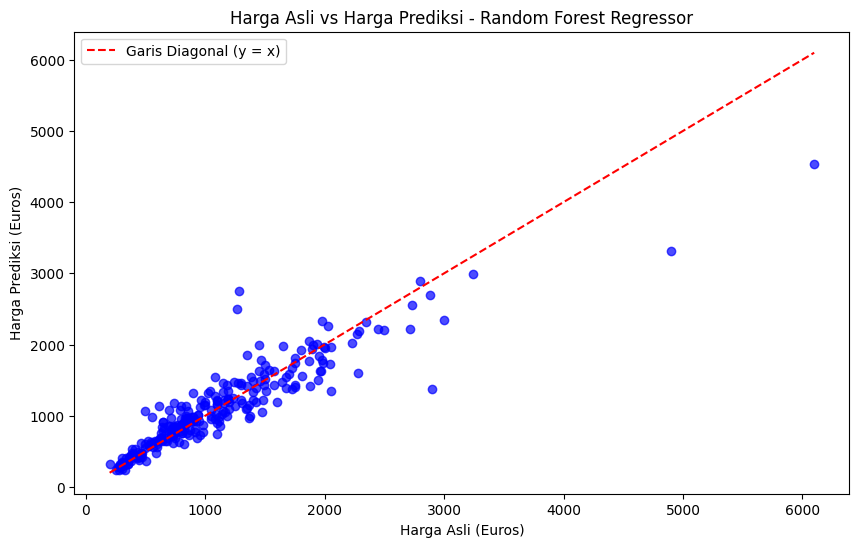

In [ ]:
# Visualisasi: Plot harga asli vs harga prediksi dengan garis diagonal
plt.figure(figsize=(10, 6))

# Scatter plot antara harga asli dan harga prediksi
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')

# Menambahkan garis diagonal (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Garis Diagonal (y = x)')

# Label dan judul
plt.xlabel("Harga Asli (Euros)")
plt.ylabel("Harga Prediksi (Euros)")
plt.title("Harga Asli vs Harga Prediksi - Random Forest Regressor")
plt.legend()

# Menampilkan plot
plt.show()


* Semakin rapat titik-titik dengan garis diagonal, semakin baik model dalam memprediksi harga laptop.
* Jika banyak titik yang menyimpang jauh, model perlu disesuaikan lebih lanjut (mungkin dengan tuning parameter atau mencoba model lain).

## Percobaan Klasifikasi

In [ ]:
def handle_unknown_label(label_encoder, label):
    """Menangani label yang belum ada di label_encoder dengan menambahkan label baru"""
    if label not in label_encoder.classes_:
        # Tambahkan label baru jika tidak ada dalam label_encoder
        label_encoder.classes_ = np.append(label_encoder.classes_, label)
    return label_encoder.transform([label])[0]

def predict_price(company, product, inches, cpu, ram, memory, gpu, weight, os):
    # Menangani label yang tidak terlihat sebelumnya
    company = handle_unknown_label(label_encoder, company)
    product = handle_unknown_label(label_encoder, product)
    cpu = handle_unknown_label(label_encoder, cpu)
    ram = handle_unknown_label(label_encoder, ram)
    memory = handle_unknown_label(label_encoder, memory)  # Pastikan menggunakan 'memory'
    gpu = handle_unknown_label(label_encoder, gpu)
    os = handle_unknown_label(label_encoder, os)

    # Membuat dataframe untuk input pengguna
    input_data = pd.DataFrame({
        'Company': [company],
        'Product': [product],
        'Inches': [inches],
        'Cpu': [cpu],
        'ScreenResolution': [ScreenResolution],
        'Ram': [ram],
        'Memory': [memory],  # Pastikan menggunakan 'memory' (huruf kecil)
        'Gpu': [gpu],
        'Weight': [weight],
        'OpSys': [os]
    })

    # Normalisasi input data
    input_scaled = scaler.transform(input_data)

    # Membuat prediksi harga
    predicted_price = model.predict(input_scaled)

    return predicted_price[0]

# Simulasi input data
company = 'HP'  # Contoh input perusahaan yang sebelumnya tidak ada
product = 'ZBook 17'  # Contoh input produk
inches = 15.6  # Ukuran layar
cpu = 'Intel Core i7'  # CPU
ScreenResolution = 15.6  # Ukuran layar, bukan CPU
ram = '8GB'  # RAM
memory = '1TB SSD'  # Memori (huruf kecil 'memory')
gpu = 'NVIDIA GeForce GTX 1050'  # GPU
weight = 2.3  # Berat
os = 'Windows 10'  # Sistem Operasi

# Melakukan prediksi
predicted_price = predict_price(company, product, inches, cpu, ram, memory, gpu, weight, os)

# Menampilkan hasil prediksi
print(f"Prediksi harga laptop dengan fitur tersebut adalah: €{predicted_price:.2f}")


Prediksi harga laptop dengan fitur tersebut adalah: €1867.76
